In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.spatial import ConvexHull
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams
rcParams['font.family'] = "Cambria"
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, Matern
from sklearn.multioutput import MultiOutputRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr
import threading
import sys
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel, RationalQuadratic
from sklearn.preprocessing import StandardScaler
import time

Load in Data

In [ ]:
#Original Data
train = pd.read_csv('train_data_pca.csv')
val = pd.read_csv('val_data_pca.csv')
test = pd.read_csv('test_data_pca.csv')
Data = pd.concat([train, val, test])
Data

,Comp,BID,SID,CID,rg,asph,acyl,anis,num dom,seg,...,PCA_40,PCA_41,PCA_42,PCA_43,PCA_44,PCA_45,PCA_46,PCA_47,PCA_48,PCA_49
0,0.1,0.2,0,0,12.228701,61.184513,30.778156,0.212441,2,48,...,-0.127528,0.259314,0.779103,0.024473,-0.033206,-0.273222,-0.010499,0.153599,0.724169,-0.125231
1,0.1,0.2,0,1,10.906473,45.301393,22.153887,0.183696,1,25,...,-0.127528,0.259314,0.779103,0.024473,-0.033206,-0.273222,-0.010499,0.153599,0.724169,-0.125231
2,0.1,0.2,0,2,11.597649,51.393123,27.237148,0.188593,2,36,...,-0.127528,0.259314,0.779103,0.024473,-0.033206,-0.273222,-0.010499,0.153599,0.724169,-0.125231
3,0.1,0.2,0,3,16.041229,155.108298,63.086271,0.407451,4,105,...,-0.127528,0.259314,0.779103,0.024473,-0.033206,-0.273222,-0.010499,0.153599,0.724169,-0.125231
4,0.1,0.2,0,4,15.312193,139.605066,62.681879,0.410806,6,108,...,-0.127528,0.259314,0.779103,0.024473,-0.033206,-0.273222,-0.010499,0.153599,0.724169,-0.125231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,0.8,0.8,32,19,8.760413,46.085312,17.843233,0.420791,1,1,...,-0.216914,0.530419,0.435945,0.228538,0.373375,-1.008531,0.865728,-0.146513,0.116123,-0.631238
1148,0.8,0.8,32,20,9.178269,54.436647,20.247372,0.485886,1,1,...,-0.216914,0.530419,0.435945,0.228538,0.373375,-1.008531,0.865728,-0.146513,0.116123,-0.631238
1149,0.8,0.8,32,21,7.178022,19.169979,12.186636,0.187127,1,1,...,-0.216914,0.530419,0.435945,0.228538,0.373375,-1.008531,0.865728,-0.146513,0.116123,-0.631238
1150,0.8,0.8,32,22,6.823963,14.391067,8.640750,0.126183,1,1,...,-0.216914,0.530419,0.435945,0.228538,0.373375,-1.008531,0.865728,-0.146513,0.116123,-0.631238


In [35]:
# Gaussian Regression Results
gpr_rg = pd.read_csv("gpr_results_rg.csv")
gpr_anis = pd.read_csv("gpr_results_anis.csv")

Data Visualization

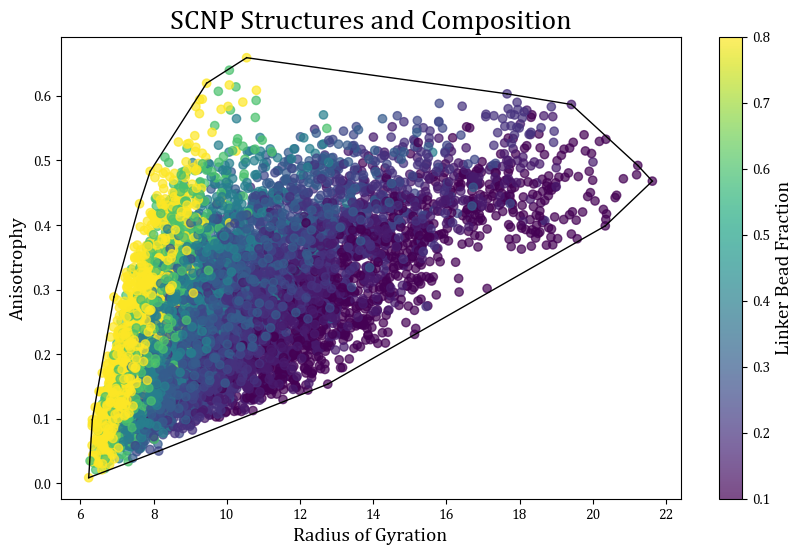

In [26]:
# Scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(Data['rg'], Data['anis'], c=Data['Comp'], cmap='viridis', alpha=0.7)

# Compute and draw Convex Hull
points = np.column_stack((Data['rg'], Data['anis']))  # Create (x, y) pairs
hull = ConvexHull(points)

for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-', linewidth=1)  # Draw solid black line

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Linker Bead Fraction', fontsize = 14)

# Labels and title
plt.xlabel('Radius of Gyration', fontsize = 14)
plt.ylabel('Anisotrophy', fontsize = 14)
plt.title('SCNP Structures and Composition', fontsize = 20)

plt.show()


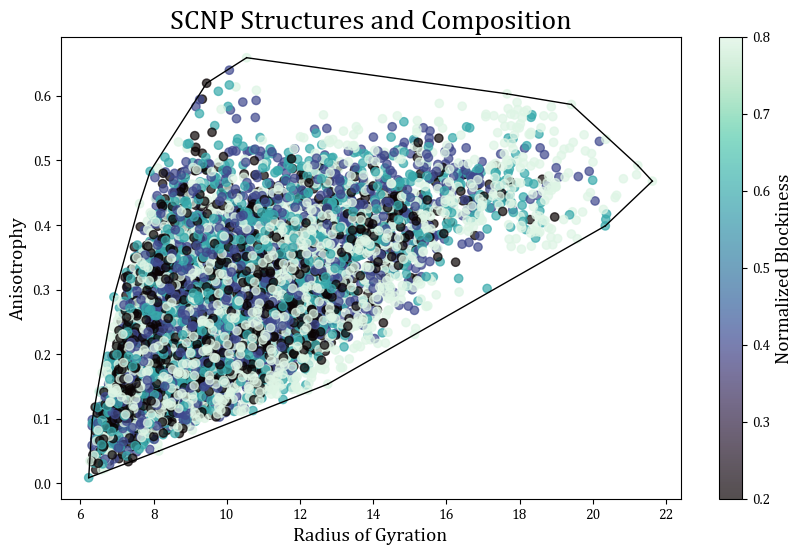

In [33]:
# Scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(Data['rg'], Data['anis'], c=Data['BID'], cmap='mako', alpha=0.7)

# Compute and draw Convex Hull
points = np.column_stack((Data['rg'], Data['anis']))  # Create (x, y) pairs
hull = ConvexHull(points)

for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-', linewidth=1)  # Draw solid black line

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Normalized Blockiness', fontsize = 14)

# Labels and title
plt.xlabel('Radius of Gyration', fontsize = 14)
plt.ylabel('Anisotrophy', fontsize = 14)
plt.title('SCNP Structures and Composition', fontsize = 20)

plt.show()


Result Interpretation

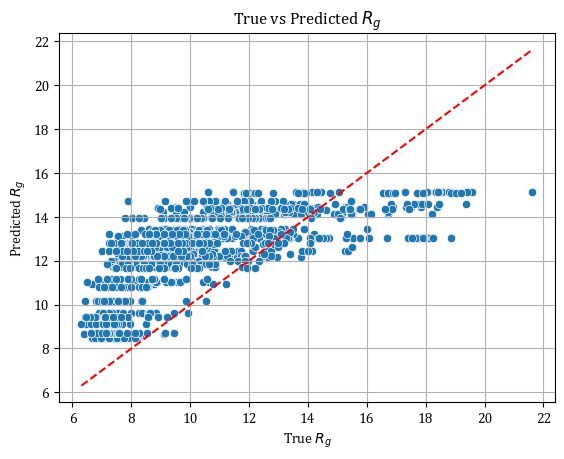

In [39]:
# Scatter plot of true vs predicted
sns.scatterplot(x='rg_true', y='rg_pred', data=gpr_rg)
plt.plot([gpr_rg['rg_true'].min(), gpr_rg['rg_true'].max()],
         [gpr_rg['rg_true'].min(), gpr_rg['rg_true'].max()],
         color='red', linestyle='--')
plt.xlabel("True $R_g$")
plt.ylabel("Predicted $R_g$")
plt.title("True vs Predicted $R_g$")
plt.grid(True)
plt.show()

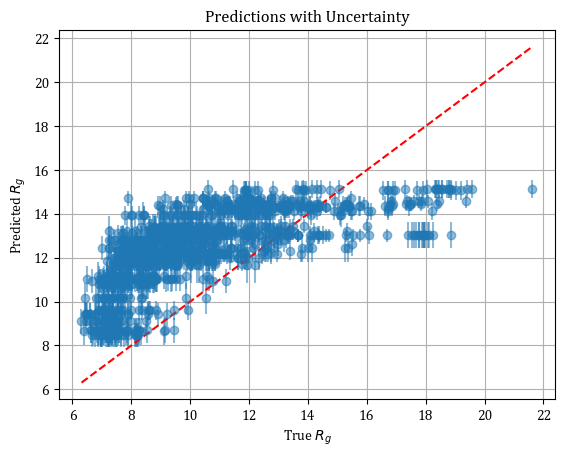

In [40]:
plt.errorbar(gpr_rg['rg_true'], gpr_rg['rg_pred'], yerr=gpr_rg['rg_std'], fmt='o', alpha=0.5)
plt.plot([gpr_rg['rg_true'].min(), gpr_rg['rg_true'].max()],
         [gpr_rg['rg_true'].min(), gpr_rg['rg_true'].max()],
         'r--')
plt.xlabel("True $R_g$")
plt.ylabel("Predicted $R_g$")
plt.title("Predictions with Uncertainty")
plt.grid(True)
plt.show()